## Executive Summary
- Churn is highest during the first 3–6 months of tenure
- Customers without partners or dependents churn more frequently
- Fiber optic users and electronic check payers exhibit higher churn
- Long-term contracts significantly reduce churn


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel(r'/Users/ziadali/Documents/Personal Projects/Data Sets/Costumer Churn Perdiction/Telco_customer_churn.xlsx')

In [4]:
df.head(1)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [ ]:
df.drop(columns=['Churn Reason'] , inplace= True)
df.drop(columns=['Lat Long'] , inplace= True)
df.drop(columns=['Latitude'] , inplace= True)
df.drop(columns=['Longitude'] , inplace= True)
df.drop(columns=['Country'] , inplace= True)
df.drop(columns=['State'] , inplace= True)
df.drop(columns=['Count'] , inplace= True)
df.drop(columns=['Country'] , inplace= True)
df.drop(columns=['State'] , inplace= True)
df.drop(columns=['Churn Label'],inplace=True)

In [13]:
#people who left and stay
df['Churn Value'].value_counts()

Churn Value
0    5174
1    1869
Name: count, dtype: int64

In [14]:
#the contract of people
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

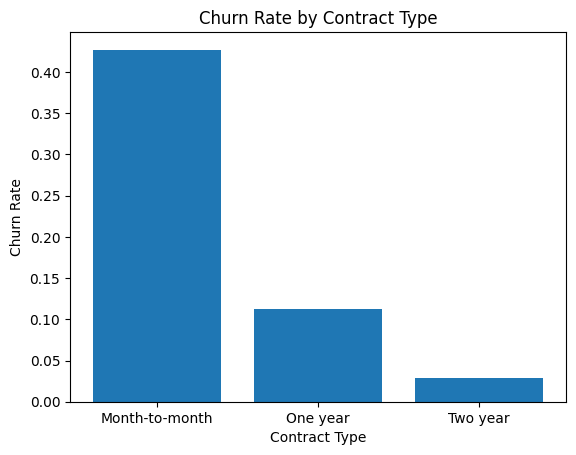

In [15]:
#people who's left and their Contract
contract_churn = df.groupby(['Contract'])['Churn Value'].agg(['count' , 'sum' ,'mean']).reset_index()
plt.bar(contract_churn['Contract'], contract_churn['mean'])
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Contract Type')
plt.show()

In [16]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

In [17]:
Senior_dic = {'Yes' : 'Senior' , 'No' : 'Young'}
df['Senior Citizen'] = df['Senior Citizen'].replace(Senior_dic)

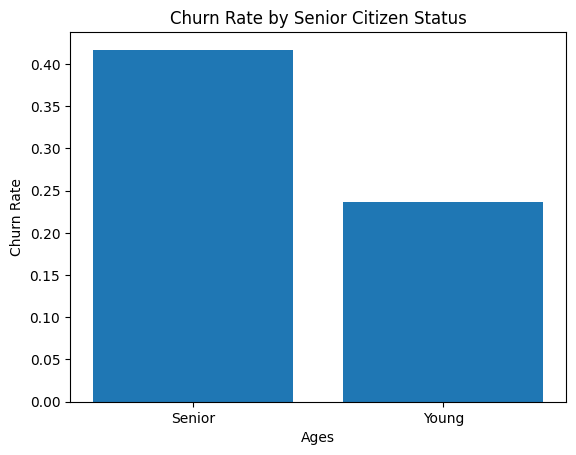

In [18]:
#people who's left and seniors or younger
churn_analysis = df.groupby('Senior Citizen')['Churn Value'].agg(['count', 'sum', 'mean']).reset_index()
plt.bar(churn_analysis['Senior Citizen'] , churn_analysis['mean'])
plt.xlabel('Ages')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Senior Citizen Status')
plt.show()

In [19]:
convert_dic = {'Yes' : 1 , 'No': 0}
df["Partner"] = df['Partner'].replace(convert_dic)

/var/folders/fc/6b57d43d15d8m9h3x_m362jh0000gn/T/ipykernel_1753/3866372688.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Partner"] = df['Partner'].replace(convert_dic)


<Axes: xlabel='Gender'>

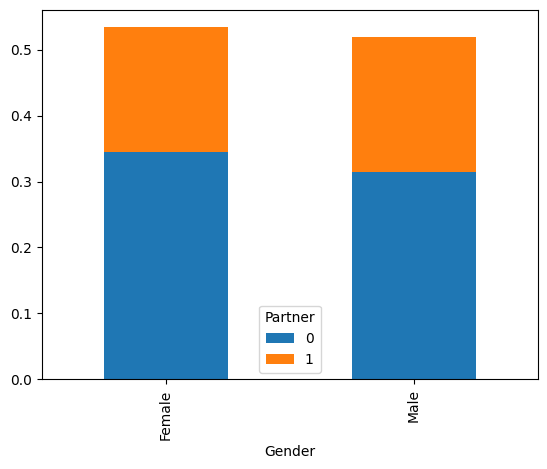

In [20]:
#genders who's has partner are left 
df.groupby(['Gender','Partner'])['Churn Value'].mean().unstack().plot(kind='bar', stacked=True)

In [21]:
#top city thier customers left
top_10_cities = (
    df.groupby('City')['Churn Value']
      .agg(churn_rate='mean', customers='count')
      .reset_index()
      .query('customers >= 30')
      .sort_values('churn_rate', ascending=False)
      .head(10)
)
top_10_cities

,City,churn_rate,customers
869,San Diego,0.333333,150
371,Glendale,0.325000,40
748,Pasadena,0.300000,30
872,San Francisco,0.298077,104
562,Los Angeles,0.295082,305
74,Berkeley,0.281250,32
972,Stockton,0.272727,44
878,San Jose,0.258929,112
354,Fresno,0.250000,64
556,Long Beach,0.250000,60


<Axes: title={'center': 'Top 10 Cities by Churn Rate'}, xlabel='City', ylabel='Churn Rate'>

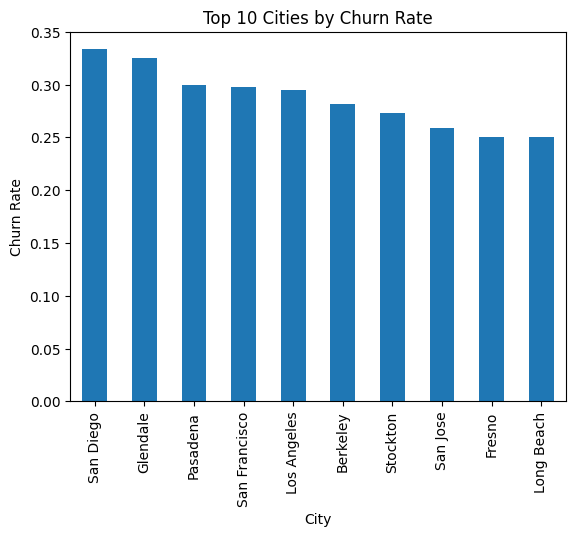

In [22]:
top_10_cities.set_index('City')['churn_rate'] \
             .plot(kind='bar', title='Top 10 Cities by Churn Rate', ylabel='Churn Rate')


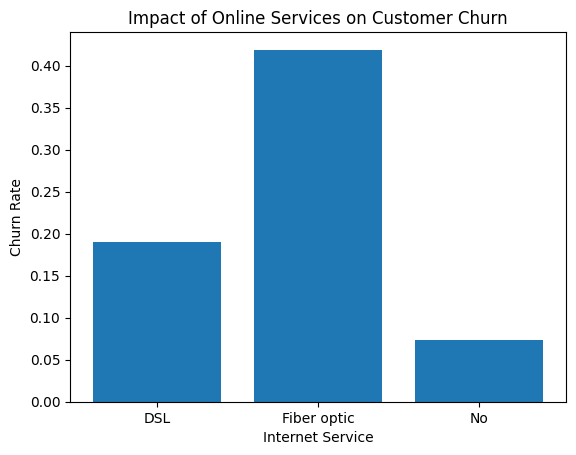

In [23]:
#people who's left depend on internt service
internetService=df.groupby('Internet Service')['Churn Value'].agg(['count' ,'sum','mean']).reset_index()
plt.bar(internetService['Internet Service'] , internetService['mean'])
plt.xlabel('Internet Service')
plt.ylabel('Churn Rate')
plt.title('Impact of Online Services on Customer Churn')
plt.show()

In [24]:
#people who's left while thay subscribe in Tech Support	or Online Security or Online Backup
df.groupby(['Tech Support' , 'Online Security' , 'Online Backup'])['Churn Value'].agg(['count' , 'sum' , 'mean']).reset_index()


,Tech Support,Online Security,Online Backup,count,sum,mean
0,No,No,No,1713,925,0.539988
1,No,No,Yes,840,325,0.386905
2,No,Yes,No,483,124,0.256729
3,No,Yes,Yes,437,72,0.164760
4,No internet service,No internet service,No internet service,1526,113,0.074050
5,Yes,No,No,482,132,0.273859
6,Yes,No,Yes,463,79,0.170626
7,Yes,Yes,No,410,52,0.126829
8,Yes,Yes,Yes,689,47,0.068215


In [25]:
#people who's left while thay subscribe in Streaming Movies or Streaming TV
df.groupby(['Streaming Movies' , 'Streaming TV'])['Churn Value'].agg(['count' , 'sum' , 'mean']).reset_index()

,Streaming Movies,Streaming TV,count,sum,mean
0,No,No,2018,695,0.344400
1,No,Yes,767,243,0.316819
2,No internet service,No internet service,1526,113,0.074050
3,Yes,No,792,247,0.311869
4,Yes,Yes,1940,571,0.294330


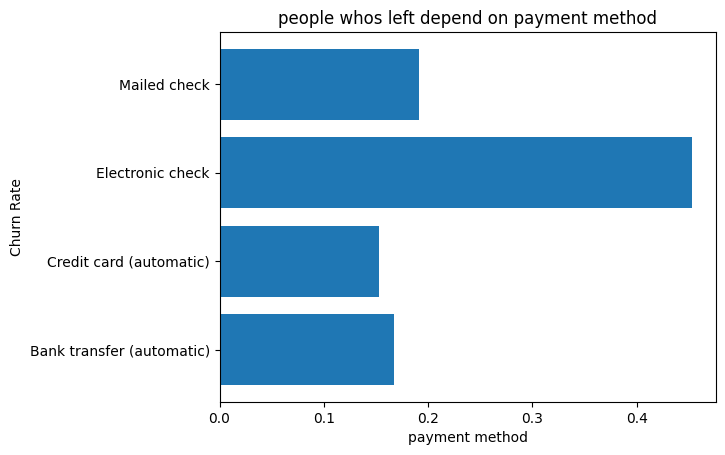

In [26]:
#people who's left depend on payment method
Payments = df.groupby(['Payment Method'])['Churn Value'].mean().reset_index()
plt.barh(Payments['Payment Method'] , Payments['Churn Value'])
plt.xlabel('payment method')
plt.ylabel('Churn Rate')
plt.title('people whos left depend on payment method')
plt.show()

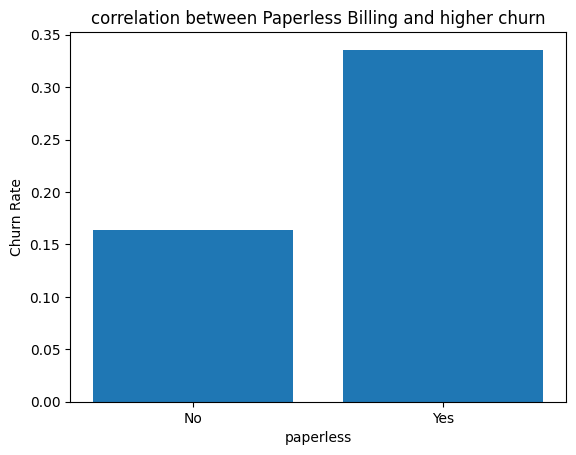

In [27]:
#correlation between Paperless Billing and higher churn
Paperless = df.groupby(['Paperless Billing'])['Churn Value'].mean().reset_index()
plt.bar(Paperless['Paperless Billing'] , Paperless['Churn Value'])
plt.xlabel('paperless')
plt.ylabel('Churn Rate')
plt.title('correlation between Paperless Billing and higher churn')
plt.show()

In [28]:
#binning Monthly_Charges_column
df['Monthly_Charges_bin'] = pd.qcut(df['Monthly Charges'] , q=4 , labels= ['Low' , 'Mid' , 'High' , 'Very High'])

/var/folders/fc/6b57d43d15d8m9h3x_m362jh0000gn/T/ipykernel_1753/1479367181.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Monthly_Charges=df.groupby(['Monthly_Charges_bin'])['Churn Value'].mean().sort_index(ascending=False).head(10).reset_index()


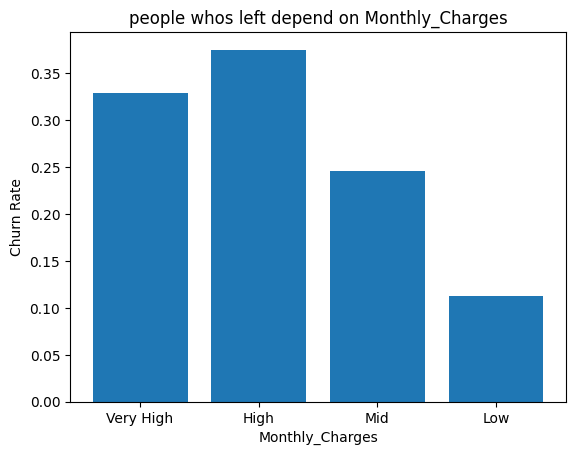

In [29]:
#people who's left depend on Monthly_Charges
Monthly_Charges=df.groupby(['Monthly_Charges_bin'])['Churn Value'].mean().sort_index(ascending=False).head(10).reset_index()
plt.bar(Monthly_Charges['Monthly_Charges_bin'] , Monthly_Charges['Churn Value'])
plt.xlabel('Monthly_Charges')
plt.ylabel('Churn Rate')
plt.title('people whos left depend on Monthly_Charges')
plt.show()

In [30]:
#people who's left depend on Total_Charges
df['Total_Charges_bin'] = pd.qcut(df['Total Charges'] , q = 3 , labels= ['Low' , 'Mid' , 'High'])

/var/folders/fc/6b57d43d15d8m9h3x_m362jh0000gn/T/ipykernel_1753/2471442229.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Total_Charges=df.groupby(['Total_Charges_bin'])['Churn Value'].mean().reset_index()


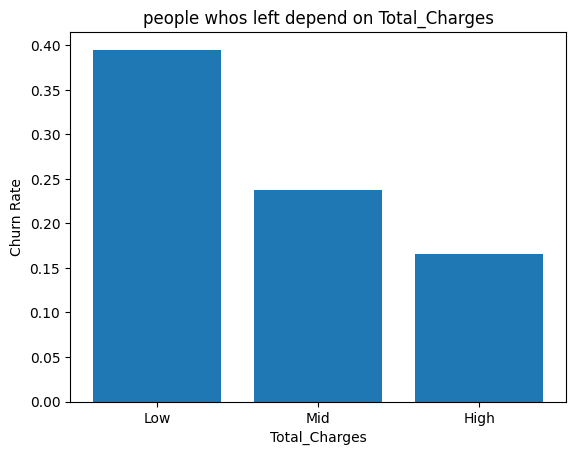

In [31]:
#people who's left depend on Total_Charges
Total_Charges=df.groupby(['Total_Charges_bin'])['Churn Value'].mean().reset_index()
plt.bar(Total_Charges['Total_Charges_bin'] , Total_Charges['Churn Value'])
plt.xlabel('Total_Charges')
plt.ylabel('Churn Rate')
plt.title('people whos left depend on Total_Charges')
plt.show()

In [32]:
##binning Tenure_Months_column
df['Tenure_Months_bin'] = pd.cut(df['Tenure Months'] , bins = [0 , 3 , 6 , 12 , 24 , 72] , labels = ['0-3' , '3-6' , '6-12' , '12-24' , '+25'])

/var/folders/fc/6b57d43d15d8m9h3x_m362jh0000gn/T/ipykernel_1753/1856260306.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Tenure_Months_bin')['Churn Value']


<Axes: title={'center': 'Churn Rate by Tenure Group'}, xlabel='Tenure (Months)', ylabel='Churn Rate'>

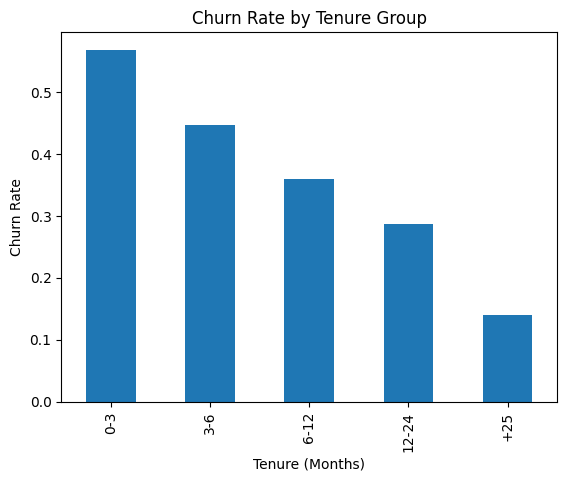

In [33]:
tenure_churn = (
    df.groupby('Tenure_Months_bin')['Churn Value']
      .mean()
      .reset_index()
)

tenure_churn.plot(
    x='Tenure_Months_bin',
    y='Churn Value',
    kind='bar',
    title='Churn Rate by Tenure Group',
    xlabel='Tenure (Months)',
    ylabel='Churn Rate',
    legend=False
)


In [34]:
#the first area i will investigate in it 
df.groupby(['City'])['Churn Value'].agg(churn_rate = 'mean' , customers = 'count').sort_values('churn_rate',ascending=False)\
    .query('customers >= 30').reset_index().head(1)

,City,churn_rate,customers
0,San Diego,0.333333,150


In [38]:
df.to_csv("processed_data.csv" , index=False)

## Recommendations

Based on the analysis conducted in this project, the following actions are recommended to reduce customer churn:

1. Focus on the first 3–6 months of customer tenure by improving onboarding, follow-up, and early customer engagement programs, as this period shows the highest churn rates.
2. Encourage customers to move from month-to-month contracts to long-term contracts by offering discounts or loyalty incentives.
3. Promote automatic payment methods (credit card or bank transfer) instead of electronic checks, as they are associated with significantly lower churn rates.
4. Bundle value-added services such as Tech Support, Online Security, and Online Backup, as customers subscribed to these services show higher retention.
5. Prioritize high-churn cities (e.g., San Diego) for targeted retention strategies and localized offers.
